In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from datetime import datetime, timedelta

In [3]:
import yfinance as yf

## Question 1: [Index] S&P 500 Stocks Added to the Index

Which year had the highest number of additions?

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [5]:
# download the data of S&P 500 (including the year each company was added to the index.)
data = pd.read_html(url)

In [6]:
# Extract the year from the addition date and calculate the number of stocks added each year.
df = data[0]
df.columns = df.columns.str.lower().str.replace(' ','_')
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['years'] = 2025 - df['year_added']
print(df.shape)
df.head()

(503, 10)


,symbol,security,gics_sector,gics_sub-industry,headquarters_location,date_added,cik,founded,year_added,years
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,1957,68
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,2017,8
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1957,68
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2012,13
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,2011,14


In [7]:
# Which year had the highest number of additions? (1957 doesn't count, as it was the year when the S&P 500 index was founded)? 
# Write down this year as your answer (the most recent one, if you have several records)
df.groupby('year_added').size().sort_values(ascending=False).head()

year_added
1957    53
2016    23
2017    23
2019    22
2008    17
dtype: int64

Answer: 2017

## Question 2. [Macro] Indexes YTD (as of 1 May 2025)

How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?

In [8]:
# Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) 
# of major stock market indexes for the following countries:
indexes = {
    'United States - S&P 500': '^GSPC',
    'China - Shanghai Composite': '000001.SS',
    'Hong Kong - HANG SENG INDEX': '^HSI',
    'Australia - S&P/ASX 200': '^AXJO',
    'India - Nifty 50': '^NSEI',
    'Canada - S&P/TSX Composite': '^GSPTSE',
    'Germany - DAX': '^GDAXI',
    'United Kingdom - FTSE 100': '^FTSE',
    'Japan - Nikkei 225': '^N225',
    'Mexico - IPC Mexico': '^MXX',
    'Brazil - Ibovespa': '^BVSP',
}

In [9]:
df_stock = yf.download(tickers=list(indexes.values()), start='2025-01-01', end='2025-05-01', progress=False)
print(df_stock.shape)
df_stock.head()

YF.download() has changed argument auto_adjust default to True
(86, 55)


Price             Close                                                    \
Ticker        000001.SS        ^AXJO     ^BVSP        ^FTSE        ^GDAXI   
Date                                                                        
2025-01-01          NaN          NaN       NaN          NaN           NaN   
2025-01-02  3262.561035  8201.200195  120125.0  8260.099609  20024.660156   
2025-01-03  3211.429932  8250.500000  118533.0  8224.000000  19906.080078   
2025-01-06  3206.923096  8288.500000  120022.0  8249.700195  20216.189453   
2025-01-07  3229.644043  8285.099609  121163.0  8245.299805  20340.570312   

Price                                                              \
Ticker            ^GSPC       ^GSPTSE          ^HSI          ^MXX   
Date                                                                
2025-01-01          NaN           NaN           NaN           NaN   
2025-01-02  5868.549805  24898.000000  19623.320312  49765.199219   
2025-01-03  5942.470215  25073.500000  19760.269531  48957.238281   
2025-01-06  5975.379883  24999.800781  19688.289062  49493.558594   
2025-01-07  5909.029785  24929.900391  19447.580078  50085.500000   

Price                     ...    Volume                                       \
Ticker             ^N225  ...     ^AXJO       ^BVSP        ^FTSE      ^GDAXI   
Date                      ...                                                  
2025-01-01           NaN  ...       NaN         NaN          NaN         NaN   
2025-01-02           NaN  ...  304400.0   9373600.0  422219900.0  52445600.0   
2025-01-03           NaN  ...  329100.0   9804400.0  742503900.0  44372900.0   
2025-01-06  39307.050781  ...   52200.0   9685600.0  766244700.0  70784900.0   
2025-01-07  40083.300781  ...  424300.0  11116400.0  741506800.0  62020000.0   

Price                                                                          \
Ticker             ^GSPC      ^GSPTSE          ^HSI         ^MXX        ^N225   
Date                                                                            
2025-01-01           NaN          NaN           NaN          NaN          NaN   
2025-01-02  3.621680e+09  215089400.0  4.033400e+09   87535300.0          NaN   
2025-01-03  3.667340e+09  186569100.0  3.393800e+09  112782300.0          NaN   
2025-01-06  4.940120e+09  239976800.0  2.465700e+09  139872100.0  137900000.0   
2025-01-07  4.517330e+09  237759800.0  3.581000e+09  142173400.0  127000000.0   

Price                 
Ticker         ^NSEI  
Date                  
2025-01-01  154900.0  
2025-01-02  283200.0  
2025-01-03  312300.0  
2025-01-06  278100.0  
2025-01-07  262300.0  

[5 rows x 55 columns]

In [10]:
df_close = df_stock['Close']
df_close.head()

Ticker,000001.SS,^AXJO,^BVSP,^FTSE,^GDAXI,^GSPC,^GSPTSE,^HSI,^MXX,^N225,^NSEI
Date,,,,,,,,,,,
2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23742.900391
2025-01-02,3262.561035,8201.200195,120125.0,8260.099609,20024.660156,5868.549805,24898.000000,19623.320312,49765.199219,NaN,24188.650391
2025-01-03,3211.429932,8250.500000,118533.0,8224.000000,19906.080078,5942.470215,25073.500000,19760.269531,48957.238281,NaN,24004.750000
2025-01-06,3206.923096,8288.500000,120022.0,8249.700195,20216.189453,5975.379883,24999.800781,19688.289062,49493.558594,39307.050781,23616.050781
2025-01-07,3229.644043,8285.099609,121163.0,8245.299805,20340.570312,5909.029785,24929.900391,19447.580078,50085.500000,40083.300781,23707.900391


In [11]:
df = df_close.melt(ignore_index=False).reset_index().dropna()
df.head()

,Date,Ticker,value
1,2025-01-02,000001.SS,3262.561035
2,2025-01-03,000001.SS,3211.429932
3,2025-01-06,000001.SS,3206.923096
4,2025-01-07,000001.SS,3229.644043
5,2025-01-08,000001.SS,3230.167969


In [12]:
df_agg = df.groupby('Ticker').agg(
                start=('value', 'first'),
                end=('value', 'last')
)
df_agg

,start,end
Ticker,,
000001.SS,3262.561035,3279.031006
^AXJO,8201.200195,8126.200195
^BVSP,120125.000000,135067.000000
^FTSE,8260.099609,8494.900391
^GDAXI,20024.660156,22496.980469
^GSPC,5868.549805,5569.060059
^GSPTSE,24898.000000,24841.699219
^HSI,19623.320312,22119.410156
^MXX,49765.199219,56259.281250


In [13]:
df_agg['YTD'] = (df_agg['end'] - df_agg['start']) / df_agg['start'] * 100
df_agg

,start,end,YTD
Ticker,,,
000001.SS,3262.561035,3279.031006,0.504817
^AXJO,8201.200195,8126.200195,-0.914500
^BVSP,120125.000000,135067.000000,12.438710
^FTSE,8260.099609,8494.900391,2.842590
^GDAXI,20024.660156,22496.980469,12.346378
^GSPC,5868.549805,5569.060059,-5.103301
^GSPTSE,24898.000000,24841.699219,-0.226126
^HSI,19623.320312,22119.410156,12.720018
^MXX,49765.199219,56259.281250,13.049444


<Axes: ylabel='Ticker'>

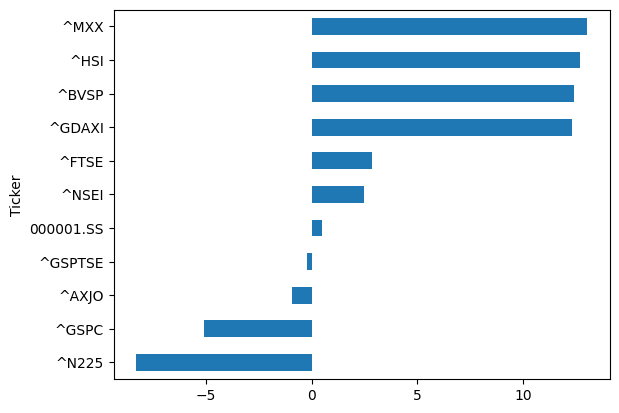

In [14]:
df_agg.sort_values(by='YTD')['YTD'].plot(kind='barh')

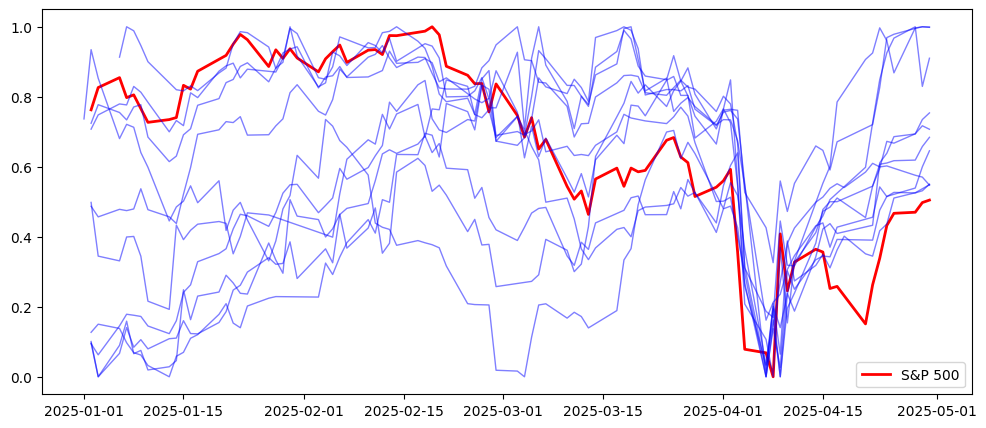

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
for idx_name, idx_ticker in indexes.items():
    df_temp = df.query('Ticker == @idx_ticker').copy()
    alpha = 1 if idx_ticker == '^GSPC' else 0.5 
    color = 'r' if idx_ticker == '^GSPC' else 'b'
    lw = 2 if idx_ticker == '^GSPC' else 1
    label = 'S&P 500' if idx_ticker == '^GSPC' else ''
    df_temp['value_norm']= (df_temp['value'] - df_temp['value'].min()) / (df_temp['value'].max() - df_temp['value'].min())
    ax.plot(df_temp['Date'], df_temp['value_norm'], alpha=alpha, color=color, lw=lw, label=label)
plt.legend()

Answer: 9 indexes (out of 10) have better year-to-date returns than the US (S&P 500) 

## Question 3. [Index] S&P 500 Market Corrections Analysis

Calculate the median duration (in days) of significant market corrections in the S&P 500 index. (a correction as an event when a stock index goes down by more than 5% from the closest all-time high maximum.)

In [16]:
# Download S&P 500 historical data (1950-present) 
df_sp500 = yf.download(tickers='^GSPC', start='1950-01-01', multi_level_index=False, progress=False)
print(df_sp500.shape)
df_sp500.head()

(18974, 5)


,Close,High,Low,Open,Volume
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,2520000


In [17]:
# Identify all-time high points (where price exceeds all previous prices)
# For each pair of consecutive all-time highs, find the minimum price in between
# Calculate drawdown percentages: (high - low) / high × 100
# Filter for corrections with at least 5% drawdown
# Calculate the duration in days for each correction period
threshold = 5
highest_value = df_sp500.iloc[0]['Close']
lowest_value = highest_value

results = []

for date, value in df_sp500['Close'].items():
    if value > highest_value:
        drawdown = 100 * (highest_value - lowest_value) / highest_value
        if drawdown > threshold:
            results.append([highest_date, highest_value, lowest_date, lowest_value, drawdown, (lowest_date - highest_date).days])

        highest_value = value
        highest_date = date        
        lowest_value = value

    elif value < lowest_value:
        lowest_value = value
        lowest_date = date 

In [18]:
df = pd.DataFrame(results,columns=['highest_date', 'highest_value', 'lowest_date', 'lowest_value', 'drawdown', 'days'])
df.sort_values(by='drawdown', ascending=False, inplace=True)
df.head()

,highest_date,highest_value,lowest_date,lowest_value,drawdown,days
56,2007-10-09,1565.150024,2009-03-09,676.530029,56.775388,517
54,2000-03-24,1527.459961,2002-10-09,776.760010,49.146948,929
24,1973-01-11,120.239998,1974-10-03,62.279999,48.203593,630
22,1968-11-29,108.370003,1970-05-26,69.290001,36.061641,543
65,2020-02-19,3386.149902,2020-03-23,2237.399902,33.924960,33


In [19]:
# Determine the 25th, 50th (median), and 75th percentiles for correction durations
np.quantile(df['days'], [0.25, 0.5, 0.75])

array([21.5, 39. , 89. ])

Answer: 39 (the median duration (in days) of significant market corrections in the S&P 500 index)

## 4. Question 4. [Stocks] Earnings Surprise Analysis for Amazon (AMZN)

Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.

In [20]:
# Load earnings data from CSV (ha1_Amazon.csv) containing earnings dates, EPS estimates, and actual EPS. 
df_eargnings = pd.read_csv('../data/ha1_Amazon.csv', delimiter=';').dropna()
df_eargnings['date'] = df_eargnings['Earnings Date'].apply(lambda x: datetime.strptime(x.split(' at ')[0], "%B %d, %Y"))
print(df_eargnings.shape)
df_eargnings.head()

(116, 7)


,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),date
0,AMZN,Amazon.com Inc,"April 29, 2026 at 6 AM EDT",-,-,-,2026-04-29
1,AMZN,Amazon.com Inc,"February 4, 2026 at 4 PM EST",-,-,-,2026-02-04
2,AMZN,Amazon.com Inc,"October 29, 2025 at 6 AM EDT",-,-,-,2025-10-29
3,AMZN,Amazon.com Inc,"July 30, 2025 at 4 PM EDT",-,-,-,2025-07-30
4,AMZN,"Amazon.com, Inc.","May 1, 2025 at 4 PM EDT",???.36,???.59,+16.74,2025-05-01


In [21]:
# convert EPS from string to float
for col in ['EPS Estimate', 'Reported EPS']:
    new_column_name = col.lower().replace(' ','_')
    df_eargnings[new_column_name] = pd.to_numeric(df_eargnings[col], errors='coerce')
df_eargnings.head(10)

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),date,eps_estimate,reported_eps
0,AMZN,Amazon.com Inc,"April 29, 2026 at 6 AM EDT",-,-,-,2026-04-29,NaN,NaN
1,AMZN,Amazon.com Inc,"February 4, 2026 at 4 PM EST",-,-,-,2026-02-04,NaN,NaN
2,AMZN,Amazon.com Inc,"October 29, 2025 at 6 AM EDT",-,-,-,2025-10-29,NaN,NaN
3,AMZN,Amazon.com Inc,"July 30, 2025 at 4 PM EDT",-,-,-,2025-07-30,NaN,NaN
4,AMZN,"Amazon.com, Inc.","May 1, 2025 at 4 PM EDT",???.36,???.59,+16.74,2025-05-01,NaN,NaN
5,AMZN,"Amazon.com, Inc.","February 6, 2025 at 4 PM EST",???.49,???.86,+24.47,2025-02-06,NaN,NaN
6,AMZN,"Amazon.com, Inc.","October 31, 2024 at 4 PM EDT",???.14,???.43,+25.17,2024-10-31,NaN,NaN
7,AMZN,"Amazon.com, Inc.","August 1, 2024 at 4 PM EDT",01.???,???.26,+22.58,2024-08-01,NaN,NaN
8,AMZN,"Amazon.com, Inc.","April 30, 2024 at 4 PM EDT",0.83,0.98,+17.91,2024-04-30,0.83,0.98
9,AMZN,"Amazon.com, Inc.","February 1, 2024 at 4 PM EST",0.8,1,+24.55,2024-02-01,0.80,1.00


In [22]:
# Identify positive earnings surprises (where "actual EPS > estimated EPS" 
df_pos = df_eargnings.dropna().query('reported_eps > eps_estimate')
print(df_pos.shape)
df_pos.head()

(33, 9)


,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),date,eps_estimate,reported_eps
8,AMZN,"Amazon.com, Inc.","April 30, 2024 at 4 PM EDT",0.83,0.98,+17.91,2024-04-30,0.83,0.98
9,AMZN,"Amazon.com, Inc.","February 1, 2024 at 4 PM EST",0.8,1,+24.55,2024-02-01,0.80,1.00
10,AMZN,"Amazon.com, Inc.","October 26, 2023 at 4 PM EDT",0.58,0.94,+60.85,2023-10-26,0.58,0.94
11,AMZN,"Amazon.com, Inc.","August 3, 2023 at 4 PM EDT",0.35,0.65,+85.73,2023-08-03,0.35,0.65
12,AMZN,"Amazon.com, Inc.","April 27, 2023 at 4 PM EDT",0.21,0.31,+46.36,2023-04-27,0.21,0.31


In [23]:
# Download complete historical price data using yfinance
df_stock = yf.download(tickers='AMZN', multi_level_index=False, progress=False)
print(df_stock.shape)
df_stock.head()

(7056, 5)


,Close,High,Low,Open,Volume
Date,,,,,
1997-05-15,0.097917,0.125000,0.096354,0.121875,1443120000
1997-05-16,0.086458,0.098958,0.085417,0.098438,294000000
1997-05-19,0.085417,0.088542,0.081250,0.088021,122136000
1997-05-20,0.081771,0.087500,0.081771,0.086458,109344000
1997-05-21,0.071354,0.082292,0.068750,0.081771,377064000


In [24]:
# Calculate 2-day percentage changes for all historical dates: 
# for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), 
# compute the return as Close_Day3 / Close_Day1 - 1. 
# (Assume Day 2 may correspond to the earnings announcement.)

df_stock['prev_close'] = df_stock['Close'].shift(1)
df_stock['next_close'] = df_stock['Close'].shift(-1)
df_stock['pct_changes'] = (100 * df_stock['next_close'] / df_stock['prev_close'] - 100).round(2)
df_stock.dropna(inplace=True)
df_stock.head()

,Close,High,Low,Open,Volume,prev_close,next_close,pct_changes
Date,,,,,,,,
1997-05-16,0.086458,0.098958,0.085417,0.098438,294000000,0.097917,0.085417,-12.77
1997-05-19,0.085417,0.088542,0.081250,0.088021,122136000,0.086458,0.081771,-5.42
1997-05-20,0.081771,0.087500,0.081771,0.086458,109344000,0.085417,0.071354,-16.46
1997-05-21,0.071354,0.082292,0.068750,0.081771,377064000,0.081771,0.069792,-14.65
1997-05-22,0.069792,0.072396,0.065625,0.071875,235536000,0.071354,0.075000,5.11


In [25]:
# Calculate 2-day percentage changes following positive earnings surprises
df_pos_pct = df_pos.set_index('date').join(df_stock['pct_changes'], how='left').reset_index()
df_pos_pct.sort_values(by='date',inplace=True)
df_pos_pct.tail()

,date,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%),eps_estimate,reported_eps,pct_changes
4,2023-04-27,AMZN,"Amazon.com, Inc.","April 27, 2023 at 4 PM EDT",0.21,0.31,+46.36,0.21,0.31,0.45
3,2023-08-03,AMZN,"Amazon.com, Inc.","August 3, 2023 at 4 PM EDT",0.35,0.65,+85.73,0.35,0.65,8.86
2,2023-10-26,AMZN,"Amazon.com, Inc.","October 26, 2023 at 4 PM EDT",0.58,0.94,+60.85,0.58,0.94,5.23
1,2024-02-01,AMZN,"Amazon.com, Inc.","February 1, 2024 at 4 PM EST",0.8,1,+24.55,0.80,1.00,10.70
0,2024-04-30,AMZN,"Amazon.com, Inc.","April 30, 2024 at 4 PM EDT",0.83,0.98,+17.91,0.83,0.98,-1.08


In [26]:
median_pos = df_pos_pct['pct_changes'].median()
median_pos

np.float64(2.57)

In [27]:
# Compare the median 2-day percentage change for positive surprises vs. all historical dates
median_full = df_stock['pct_changes'].median()
median_full

np.float64(0.165)

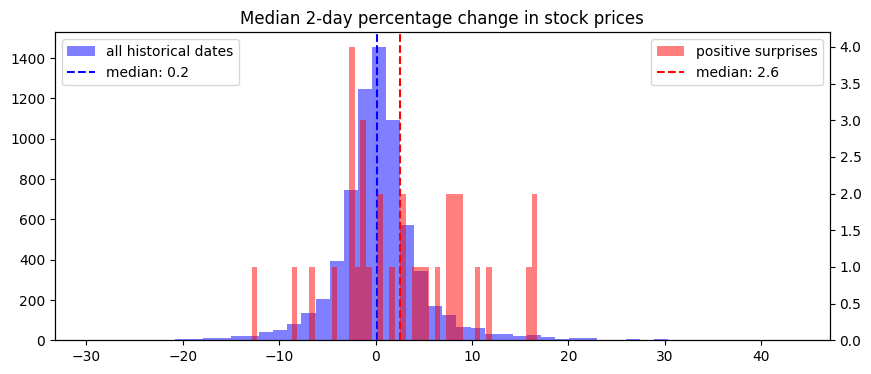

In [29]:
fig, ax = plt.subplots(figsize=(10, 4))

line1 = ax.hist(df_stock['pct_changes'], bins=50, color='b', alpha=0.5, label='all historical dates')
ax.axvline(median_full, linestyle='--', color='b', label=f'median: {median_full:.1f}')
ax.legend(loc='upper left')

ax2 = ax.twinx()
line2 = ax2.hist(df_pos_pct['pct_changes'],bins=50, color='r', alpha=0.5, label='positive surprises')
ax2.axvline(median_pos, linestyle='--', color='r', label=f'median: {median_pos:.1f}')
ax2.legend(loc='upper right')

plt.title('Median 2-day percentage change in stock prices');

In [30]:
# Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term
Answer: 2.6

## Question 5. [Exploratory, optional] Brainstorm potential idea for your capstone project

I want to build a stock market classification ML model that will recommend stocks to buy from a given list. 

I plan to compare its performance against a dummy model based on moving averages.

I plan to use the F1-score metric.